In [1]:
import time
import sys
import os
import pytest
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

sys.path.insert(0, os.path.join(os.getcwd(), "..", "py_prim"))
import py_prim

### Test on small graph of known structure

{(0, 1): Text(0.24999996274709668, 0.43301271829021687, "{'weight': 3}"),
 (1, 2): Text(-0.5, -9.934107536579972e-09, "{'weight': 4}")}

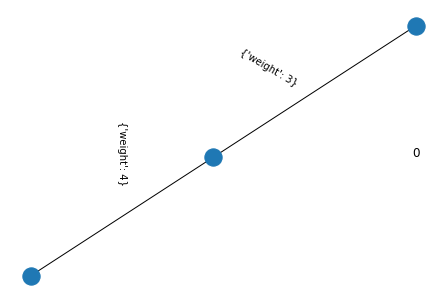

In [2]:
adjacency_matrix = [
    [0, 3, 0], 
    [3, 0, 4], 
    [0, 4, 0]
]
graph = nx.from_numpy_matrix(np.matrix(adjacency_matrix))
nx.draw(graph)
nx.draw_networkx_labels(graph, pos=nx.circular_layout(graph))
nx.draw_networkx_edge_labels(graph, pos=nx.circular_layout(graph))

In [3]:
expected = nx.minimum_spanning_tree(graph, algorithm = 'prim')
actual_edges = py_prim.run_algorithm(adjacency_matrix)
actual = nx.Graph()
actual.add_edges_from(actual_edges)

print(sorted(expected.edges))
print(sorted(actual.edges))
assert nx.is_isomorphic(expected, actual)

[(0, 1), (1, 2)]
[(0, 1), (1, 2)]


#### Visualization:

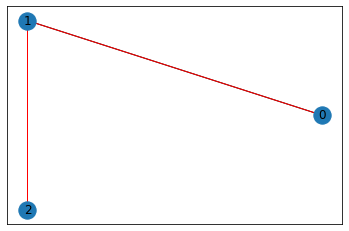

In [4]:
nx.draw_networkx(graph, pos=nx.circular_layout(graph))
nx.draw_networkx_edges(graph, pos=nx.circular_layout(graph), edgelist = expected.edges(), edge_color='red')

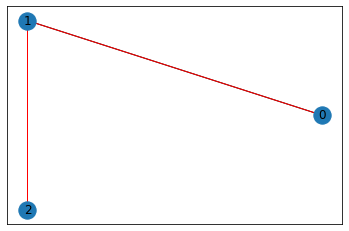

In [5]:
nx.draw_networkx(graph, pos=nx.circular_layout(graph))
nx.draw_networkx_edges(graph, pos=nx.circular_layout(graph), edgelist = actual.edges(), edge_color='red')

### Test on bigger graph of known structure

{(0, 1): Text(0.654508480212244, 0.4755283023511464, "{'weight': 1}"),
 (0, 2): Text(0.09549145273252935, 0.2938926212887637, "{'weight': 2}"),
 (0, 3): Text(0.09549151233717518, -0.2938926630120157, "{'weight': 4}"),
 (0, 4): Text(0.6545085547180512, -0.4755282248651067, "{'weight': 1}"),
 (1, 2): Text(-0.2500000670552266, 0.7694208997980517, "{'weight': 1}"),
 (1, 3): Text(-0.2500000074505807, 0.1816356154972723, "{'weight': 3}"),
 (1, 4): Text(0.30901703493029536, 5.3644181319256745e-08, "{'weight': 3}"),
 (2, 3): Text(-0.8090170349302954, -6.55651103964594e-08, "{'weight': 1}"),
 (2, 4): Text(-0.24999999254941926, -0.18163562741820138, "{'weight': 2}"),
 (3, 4): Text(-0.24999993294477343, -0.7694209117189807, "{'weight': 5}")}

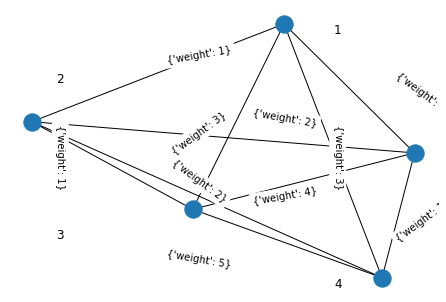

In [6]:
adjacency_matrix = [
    [0, 1, 2, 4, 1], 
    [1, 0, 1, 3, 3], 
    [2, 1, 0, 1, 2], 
    [4, 3, 1, 0, 5], 
    [1, 3, 2, 5, 0]
]
graph = nx.from_numpy_matrix(np.matrix(adjacency_matrix))
nx.draw(graph)
nx.draw_networkx_labels(graph, pos=nx.circular_layout(graph))
nx.draw_networkx_edge_labels(graph, pos=nx.circular_layout(graph))

In [7]:
expected = nx.minimum_spanning_tree(graph, algorithm = 'prim')
actual_edges = py_prim.run_algorithm(adjacency_matrix)
actual = nx.Graph()
actual.add_edges_from(actual_edges)

print(sorted(expected.edges))
print(sorted(actual.edges))
assert nx.is_isomorphic(expected, actual)

[(0, 1), (0, 4), (1, 2), (2, 3)]
[(0, 1), (0, 4), (1, 2), (2, 3)]


#### Visualization:

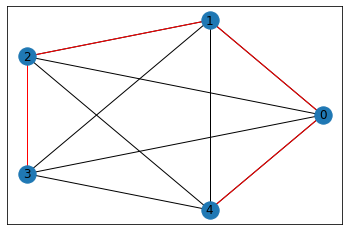

In [8]:
nx.draw_networkx(graph, pos=nx.circular_layout(graph))
nx.draw_networkx_edges(graph, pos=nx.circular_layout(graph), edgelist = expected.edges(), edge_color='red')

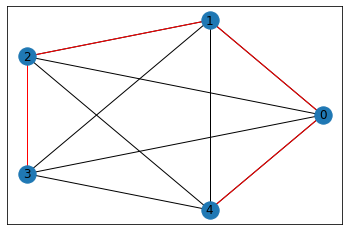

In [9]:
nx.draw_networkx(graph, pos=nx.circular_layout(graph))
nx.draw_networkx_edges(graph, pos=nx.circular_layout(graph), edgelist = actual.edges(), edge_color='red')

### Check corectness on random complete graphs

In [11]:
def test(max_weight: int):
    isomorphic_cases = 0
    correct_cases = 0
    all_cases = 100
    
    for i in range(0, all_cases):
        graph = nx.complete_graph(50)
        for (start, end) in graph.edges:
            graph.edges[start, end]['weight'] = random.randrange(1, max_weight)

        expected = nx.minimum_spanning_tree(graph, algorithm = 'prim')
        sum_of_weights_expected = expected.size(weight='weight')

        adjacency_matrix = nx.to_numpy_array(graph, dtype='int32').tolist()

        actual_edges = py_prim.run_algorithm(adjacency_matrix)
        actual = graph.edge_subgraph(actual_edges)
        sum_of_weights_actual = actual.size(weight='weight')

        if nx.is_isomorphic(expected, actual):
            isomorphic_cases = isomorphic_cases + 1

        if nx.is_tree(actual) and actual.number_of_nodes() == graph.number_of_nodes() and sum_of_weights_expected == sum_of_weights_actual:
            correct_cases = correct_cases + 1
        
    print("Algorithm generated isomorphic graph in ", 100 * isomorphic_cases/all_cases, "% cases")        
    print("Algorithm run correctly in ", 100 * correct_cases/all_cases, "% cases")

In [12]:
random.seed(31)
test(max_weight = 100);

Algorithm generated isomorphic graph in  0.0 % cases
Algorithm run correctly in  0.0 % cases


The bigger is the probability of unique weights, the more likely there is only one possible MST, thus expected and actual graphs are isomorphic.

In [68]:
random.seed(31)
test(max_weight = 1000)

Algorithm generated isomorphic graph in  72.0 % cases
Algorithm run correctly in  100.0 % cases


In [69]:
random.seed(31)
test(max_weight = 10000)

Algorithm generated isomorphic graph in  94.0 % cases
Algorithm run correctly in  100.0 % cases
